In [1]:
from sdfray.light import DistantLight,PointLight,AmbientLight
from sdfray.scene import Scene,Camera
from sdfray.geom import Union,Intersection,Subtraction
from sdfray.shapes import Sphere,Box,Cylinder,Plane
from sdfray.surface import UniformSurface,SurfaceProp,CheckerSurface
from sdfray.util import *

import numpy as np
import os

In [13]:
import io
import imageio
import base64 
from IPython.display import HTML

def encode_gif(scene,times=np.linspace(0,2*np.pi,300),**kwargs):
    output = io.BytesIO()
    scene.clear_cache()
    with imageio.get_writer(output, format='gif', mode='I', duration='0.05') as writer:
        for time in times:
            v = scene.render(time=time,true_optics=True,**kwargs)
            writer.append_data(np.asarray(v))
    output.seek(0)
    return output.read()

def display_gif(gif):
    b64 = base64.b64encode(gif)
    display(HTML(f'<img src="data:image/gif;base64,{b64.decode()}"/>'))
    
def encode_mp4(scene,times=np.linspace(0,2*np.pi,600),fps=60,framedir=None,**kwargs):
    try:
        os.mkdir(framedir)
    except:
        pass
    output = io.BytesIO()
    scene.clear_cache()
    with imageio.get_writer(output, format='mp4', mode='I', fps=fps) as writer:
        for i,time in enumerate(times):
            v = scene.render(time=time,true_optics=True,**kwargs)
            if framedir is not None:
                v.save(f'{framedir}/frame_{i:05d}.png')
            writer.append_data(np.asarray(v))
    output.seek(0)
    return output.read()

def display_mp4(mp4,fname=None):
    if fname is None:
        b64 = base64.b64encode(mp4)
        src = f'data:video/mp4;base64,{b64.decode()}'
    else:
        with open(fname,'wb') as fout:
            fout.write(mp4)
        src = fname
    display(HTML(f'<video controls loop src="{src}"/>'))

In [14]:
lights = [
    PointLight([50,0,0],[2,2.5,-2]),
    PointLight([0,50,0],[-2,2.5,0]),
    PointLight([0,0,50],[2,2.5,2])
]

In [15]:
ctx = Context()
t = ctx['u_time']
ct = np.cos(t)
st = np.sin(t)
c = Camera(camera_orig=10*A([st,0,-ct]),camera_yaw=-t,width_px=912,height_px=624)

s = Scene(Sphere(),lights,cam=c)

display_mp4(encode_mp4(s,passes=25,framedir='test_sphere'),fname='test_sphere.mp4')

In [17]:
ctx = Context()
t = ctx['u_time']
ct = np.cos(t)
st = np.sin(t)
c = Camera(camera_orig=10*A([st,0,-ct]),camera_yaw=-t,width_px=912,height_px=624)

glossy = UniformSurface(SurfaceProp(diffuse=0.2,specular=0.8))
clear = UniformSurface(SurfaceProp(diffuse=0.05,specular=0.1,transmit=0.85,refractive_index=1.4))

sdf = Sphere(translate=[0,0,0],radius=0.9,surface=glossy)
sdf = Union(Box(translate=[-2,0,0],rotate=[0,3*t,2*t],depth=1.5,height=1.5,width=1.5,surface=clear),sdf)
sdf = Union(Cylinder(translate=[2,0,0],rotate=[3*t,t,0],radius=0.9,height=1.5,surface=clear),sdf)

clear_demo_sdf = Union(sdf,Plane(anchor=[0,-1,0],surface=CheckerSurface(checker_size=0.25)))

point_lights = [
    PointLight([100,0,0],[2,2.5,-2]),
    PointLight([0s,100,0],[-2,2.5,0]),
    PointLight([0,0,100],[2,2.5,2])
]

s = Scene(clear_demo_sdf,point_lights,cam=c)

In [18]:
display_mp4(encode_mp4(s,passes=10000,framedir='raytrace_10k'),fname='raytrace_10k.mp4')

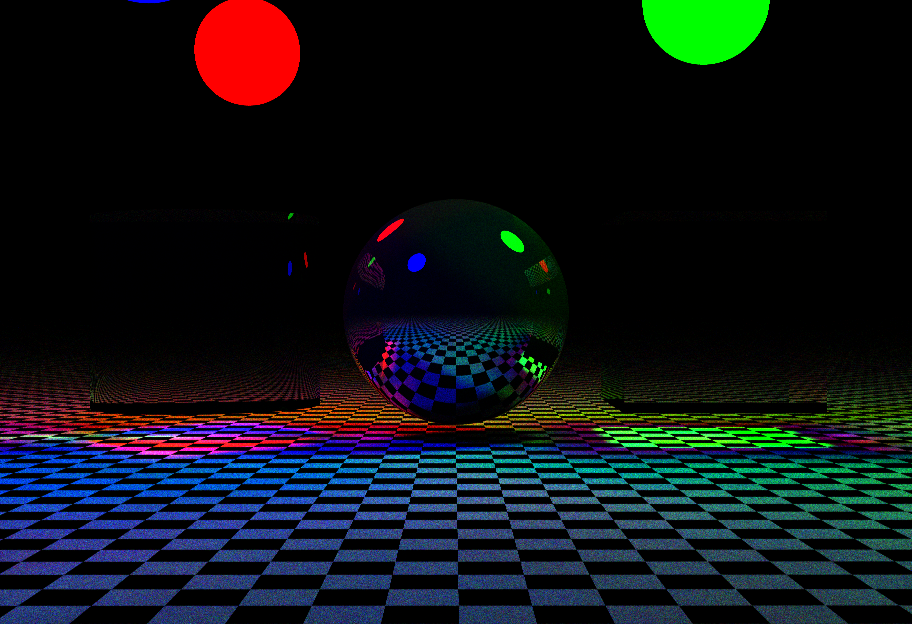

In [19]:
s.clear_cache()
s.render(true_optics=True,time=3.14,ang_res=0.02,passes=5000)

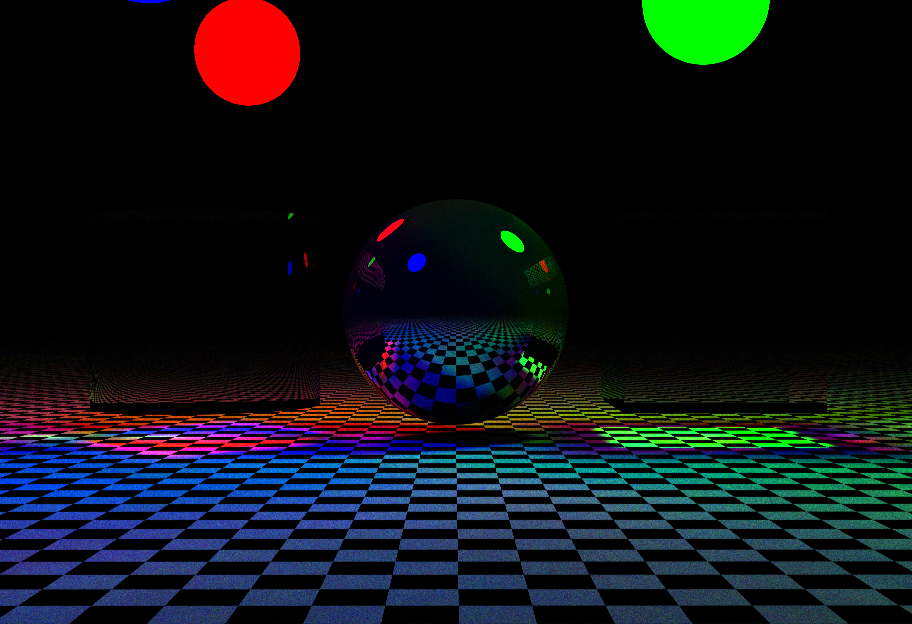

In [20]:
s.clear_cache()
s.render(true_optics=True,time=3.14,ang_res=0.02,passes=10000)